In [77]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
# client = Socrata("data.wa.gov", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.wa.gov",
                 "9Wd0idzQuFB6INKzZXZH63zT2",
                 username="dzjfrank@gmail.com",
                 password="Qwer1234")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("brw6-jymh", limit=2000, where = "model_year > 2020", select = "start_of_month, make, model, model_year, county")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [78]:
len(results_df)

2000

In [79]:
results_df.head(1)

,start_of_month,make,model,model_year,county
0,2020-02-01T00:00:00.000,KIA,SELTOS,2021,Spokane


In [56]:
results_df

,start_of_month,make,model,model_year,vehicle_type,vehicle_primary_use,fuel_type_primary,gross_vehicle_weight_rating_class,gross_vehicle_weight_rating_range,electrification_level,...,owner_type,county,state,zip_code,transaction_type,transaction_channel,_2020_census_tract,vehicle_record_count,primary_color,fuel_type_secondary
0,2020-01-01T00:00:00.000,ACURA,MDX,2015,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",ICE (Internal Combustion Engine),...,Individual Owner,King,WA,98126,Registration Renewal,In-person,53033010501,1,NaN,NaN
1,2020-01-01T00:00:00.000,ACURA,MDX,2015,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",ICE (Internal Combustion Engine),...,Individual Owner,Thurston,WA,98579,Registration Renewal,In-person,53067012730,1,NaN,NaN
2,2020-01-01T00:00:00.000,ACURA,RDX,2015,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1C,"4,001 - 5,000",ICE (Internal Combustion Engine),...,Individual Owner,Spokane,WA,99205,Registration Renewal,Online,53063001000,1,NaN,NaN
3,2020-01-01T00:00:00.000,ACURA,RDX,2015,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1C,"4,001 - 5,000",ICE (Internal Combustion Engine),...,Individual Owner,King,WA,98010,Registration Renewal,Online,53033031605,1,BLACK,NaN
4,2020-01-01T00:00:00.000,BMW,M4,2015,PASSENGER CAR,Passenger,Gasoline,NaN,NaN,ICE (Internal Combustion Engine),...,Individual Owner,King,WA,98004,Registration Renewal,Online,53033023807,1,GRAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2020-01-01T00:00:00.000,TOYOTA,TACOMA,2015,TRUCK,Truck,Gasoline,1,"6,000",ICE (Internal Combustion Engine),...,Individual Owner,Thurston,WA,98513,Registration Renewal,In-person,53067012320,1,WHITE,NaN
19996,2020-01-01T00:00:00.000,TOYOTA,YARIS,2015,PASSENGER CAR,Passenger,Gasoline,NaN,NaN,ICE (Internal Combustion Engine),...,Individual Owner,King,WA,98033,Registration Renewal,Online,53033022501,1,NaN,NaN
19997,2020-01-01T00:00:00.000,VOLKSWAGEN,GOLF,2015,PASSENGER CAR,Passenger,Diesel,NaN,NaN,ICE (Internal Combustion Engine),...,Individual Owner,Whatcom,WA,98248,Original Registration,In-person,53073010504,1,GRAY,NaN
19998,2020-01-01T00:00:00.000,VOLKSWAGEN,GOLF SPORTWAGEN,2015,PASSENGER CAR,Passenger,Diesel,NaN,NaN,ICE (Internal Combustion Engine),...,Individual Owner,Unknown or Out of State,WA,98527,Registration Renewal,In-person,53049950301,1,NaN,NaN


import os
import requests

current_file_path = os.path.abspath(__file__)
project_root = os.path.dirname(os.path.dirname(current_file_path))

data_raw_folder = os.path.join(project_root, 'data', 'raw')

# create data/raw/ folder
if not os.path.exists(data_raw_folder):
    os.makedirs(data_raw_folder)

# download data
data_file_path = os.path.join(data_raw_folder, 'vehicleData.csv')

url = r'https://data.wa.gov/api/views/brw6-jymh/rows.csv?accessType=DOWNLOAD'
r = requests.get(url)
with open(data_file_path, 'wb') as f:
    f.write(r.content)

print('Data downloaded and saved to {}'.format(data_file_path))


In [50]:
chunk_size = 2000000
cols_to_use = ['Make', 'Model', "Model Year",]
chunks = pd.read_csv('../data/raw/vehicleData.csv', usecols=cols_to_use, chunksize=chunk_size)


In [82]:
df = pd.read_csv('../data/raw/vehicleData.csv', )

/var/folders/08/h1s377jj0hs79v0t6mc5wfgc0000gn/T/ipykernel_67127/3911989319.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/vehicleData.csv', )


In [83]:
len(df)

27478265

# Only focous on data after 2013

In [104]:
df2 = df[df["Model Year"] > 2013]

In [135]:
df3 = df2[df2["Model Year"] < 2024]

In [138]:
df3.to_csv('../data/raw/vehicleData2013_2023.csv', index=False)

In [ ]:
len(df2)

In [105]:
df2.to_csv('../data/raw/vehicleData2013.csv', index=False)

In [106]:
df2.head(2)
len(df2)

11172208

In [139]:
df_temp = df3.sample(10000)

In [96]:
len(df_temp)

10000

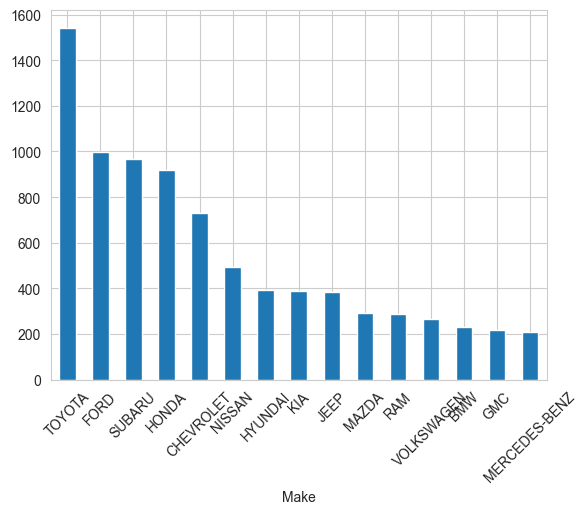

In [140]:
import matplotlib.pyplot as plt
df_temp["Make"].value_counts()[df_temp["Make"].value_counts() > 200].plot.bar()
plt.xticks(rotation=45);

In [141]:
df_temp.columns

Index(['Transaction Month and Year', 'Make', 'Model', 'Model Year',
       'Vehicle Color', 'Vehicle Type', 'Vehicle Primary Use',
       'Fuel Type Primary', 'Fuel Type Secondary',
       'Gross Vehicle Weight Rating Class',
       'Gross Vehicle Weight Rating Range (lbs)', 'Electrification Level',
       'Plate Background', 'Plate Configuration', 'Owner Type', 'County',
       'State', 'Postal Code', 'Transaction Type', 'Transaction Channel',
       '2020 GEOID', 'Transaction Count'],
      dtype='object')

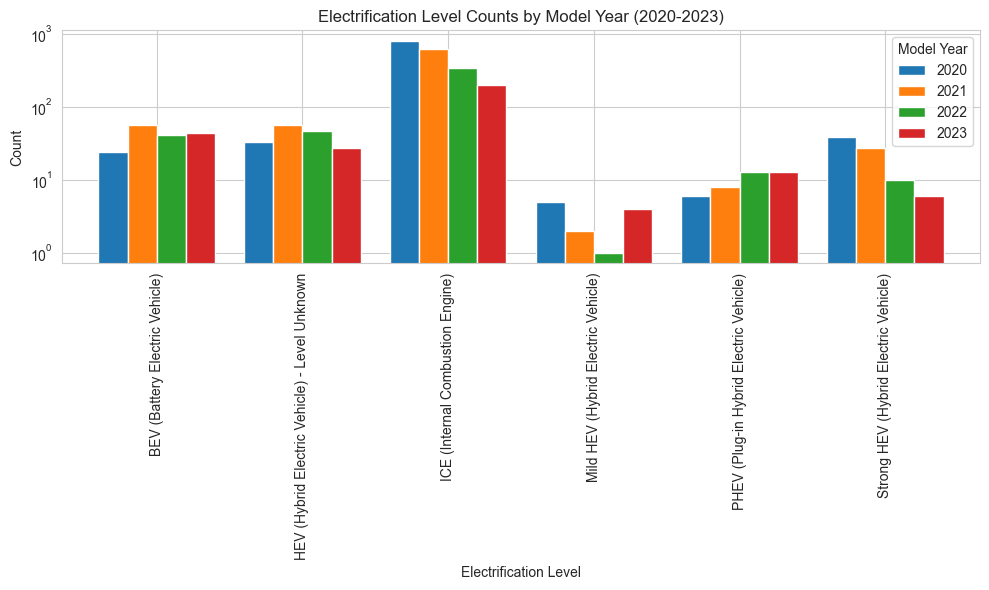

In [145]:
df_mock = df_temp[["Model Year", "Electrification Level"]].copy()

# Filter the DataFrame for the relevant years (already done in mock data creation)
df_filtered_mock = df_mock[df_mock["Model Year"].between(2020, 2023)]

# Group by "Model Year" and "Electrification Level", count the occurrences
df_count = df_filtered_mock.groupby(['Electrification Level', 'Model Year']).size().unstack(fill_value=0)

# Plotting the bar chart with year-wise groups for each Electrification Level
df_count.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Electrification Level Counts by Model Year (2020-2023)')
plt.xlabel('Electrification Level')
plt.ylabel('Count')
plt.yscale('log')
# plt.xticks(rotation=45)
plt.legend(title='Model Year')
plt.tight_layout()
plt.show()


BEV, HEV and PHEV are growing and ICS is droping over time. 

<Axes: xlabel='Make'>

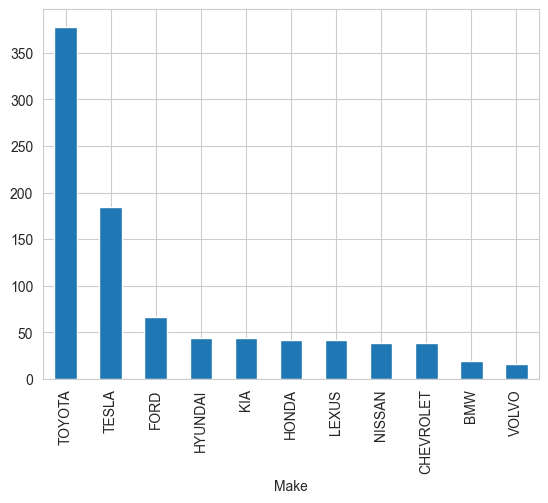

In [146]:
df_temp[df_temp["Electrification Level"] != "ICE (Internal Combustion Engine)"]["Make"].value_counts()[df_temp[df_temp["Electrification Level"] != "ICE (Internal Combustion Engine)"]["Make"].value_counts() > 10].plot.bar()

<Axes: xlabel='Make'>

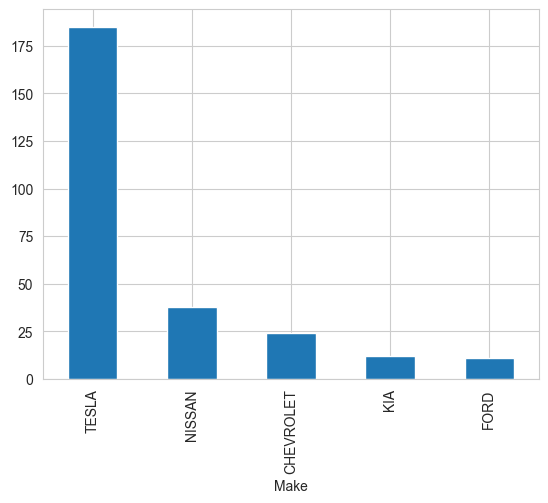

In [147]:
df_temp[df_temp["Electrification Level"] == "BEV (Battery Electric Vehicle)"]["Make"].value_counts()[df_temp[df_temp["Electrification Level"] == "BEV (Battery Electric Vehicle)"]["Make"].value_counts() > 10].plot.bar()

In [149]:
data = df_temp


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


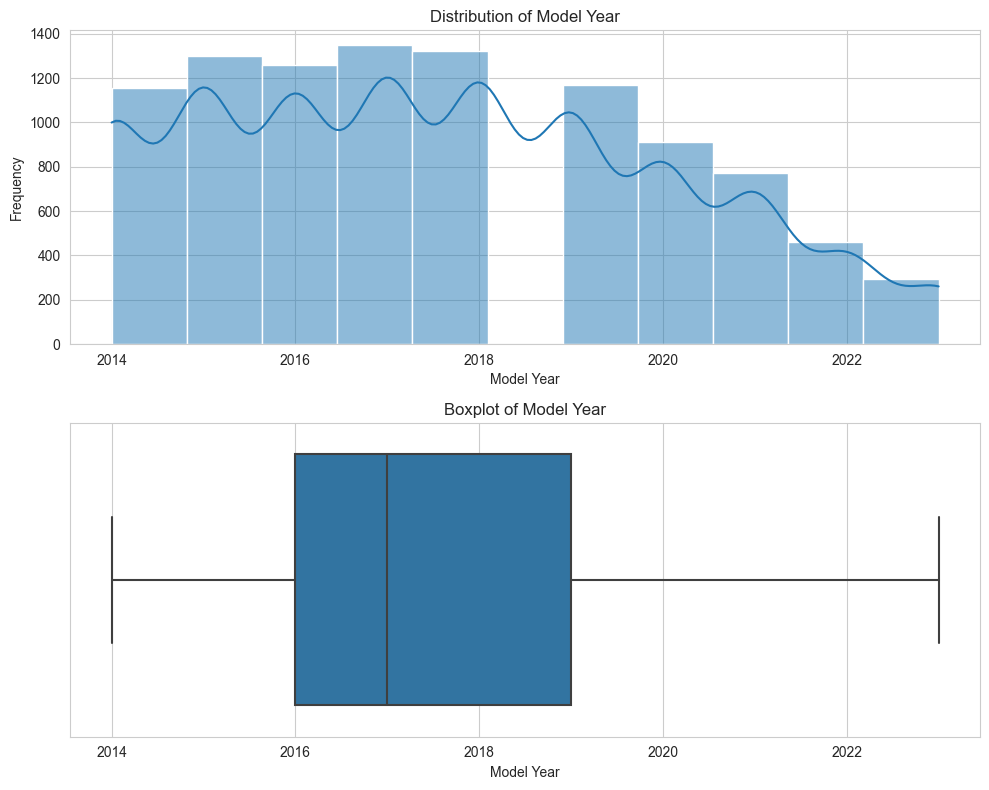

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure to hold the subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for Model Year
sns.histplot(data['Model Year'], bins=11, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Model Year')
ax[0].set_xlabel('Model Year')
ax[0].set_ylabel('Frequency')

# Boxplot for Model Year
sns.boxplot(x=data['Model Year'], ax=ax[1])
ax[1].set_title('Boxplot of Model Year')
ax[1].set_xlabel('Model Year')

plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


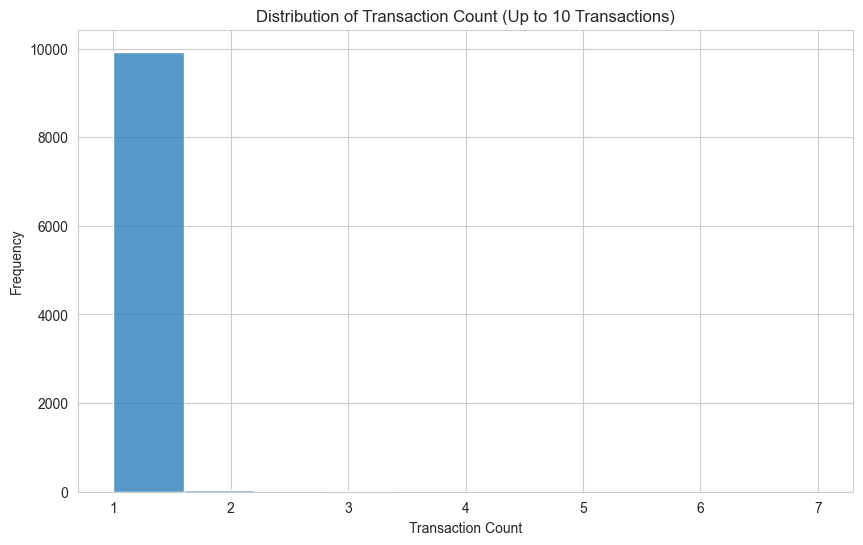

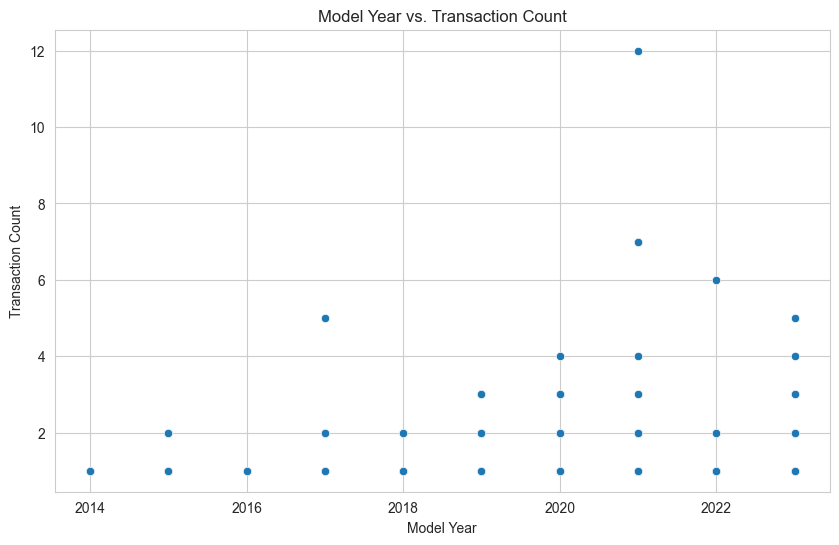

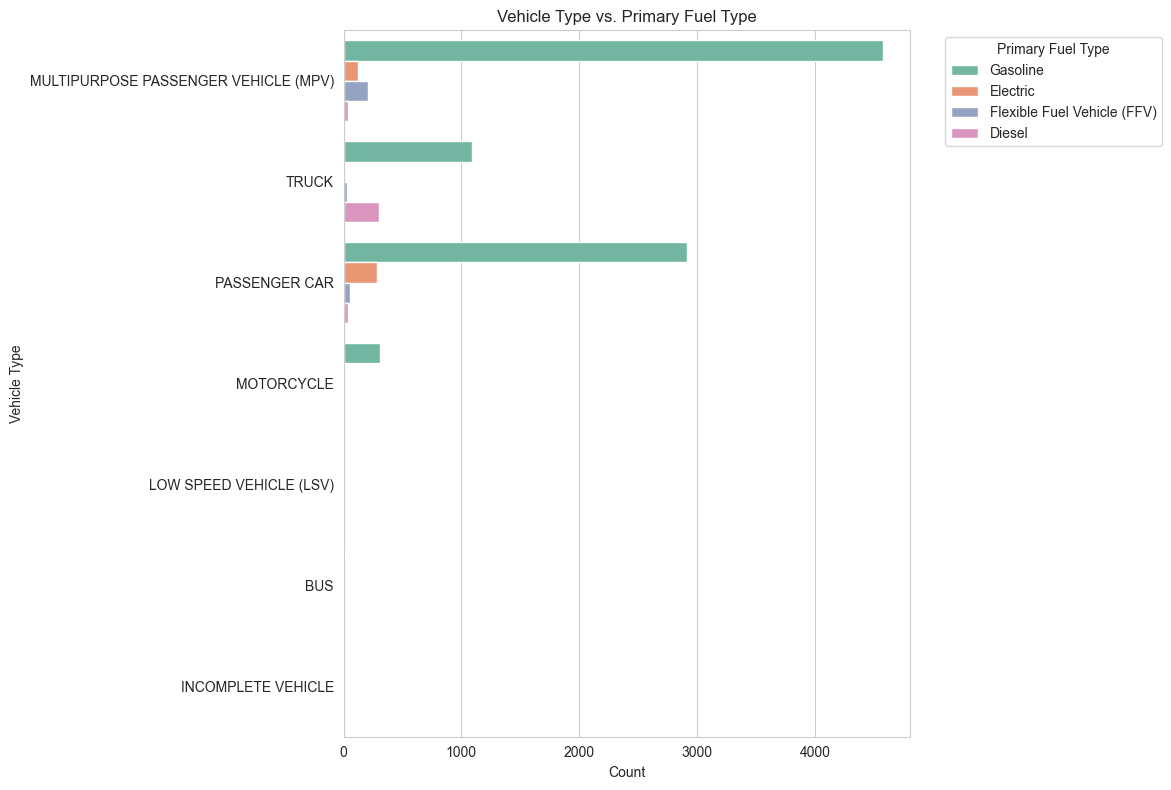

In [153]:
# Creating a figure to hold the histogram for Transaction Count
plt.figure(figsize=(10, 6))

# Histogram for Transaction Count with a higher range of bins to capture the spread
sns.histplot(data[data['Transaction Count'] <= 10]['Transaction Count'], bins=10, kde=False)
plt.title('Distribution of Transaction Count (Up to 10 Transactions)')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')

plt.show()

# Scatter plot for Model Year vs. Transaction Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Transaction Count', data=data)
plt.title('Model Year vs. Transaction Count')
plt.xlabel('Model Year')
plt.ylabel('Transaction Count')
plt.show()

# Count plot for Vehicle Type vs. Fuel Type Primary
plt.figure(figsize=(12, 8))
sns.countplot(y='Vehicle Type', hue='Fuel Type Primary', data=data, palette='Set2')
plt.title('Vehicle Type vs. Primary Fuel Type')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.legend(title='Primary Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Distribution of Transaction Count (Up to 10 Transactions)

The histogram shows that the vast majority of transactions involve only 1 vehicle transaction, with a sharp decrease as the transaction count increases. This distribution confirms the preliminary analysis, suggesting singular transactions dominate the dataset. There's a very low frequency of transactions above 1, highlighting the rarity of multiple transactions for a single entity within this dataset.

Model Year vs. Transaction Count

The scatter plot does not indicate a strong, visible correlation between the model year of vehicles and the transaction count. Most data points are concentrated at the lower end of the transaction count (primarily at 1), across all model years. This suggests that the frequency of transactions is relatively consistent across different vehicle model years.

Vehicle Type vs. Primary Fuel Type

The count plot reveals the distribution of primary fuel types across different vehicle types. It highlights a clear dominance of gasoline as the primary fuel type across most vehicle types. There's noticeable diversity in the fuel types for "MULTIPURPOSE PASSENGER VEHICLE (MPV)" and "PASSENGER CAR," which also include a smaller number of electric and diesel vehicles. This visualization can help understand the penetration of different fuel types in the market, especially in the context of environmental policies or market trends towards more sustainable fuel options.

In [156]:
# Convert 'Transaction Month and Year' to datetime format
data['Transaction Month and Year'] = pd.to_datetime(data['Transaction Month and Year'], format='%m/%d/%Y')

# Aggregate data by month to get the count of transactions per month
transactions_per_month = data.groupby(data['Transaction Month and Year'].dt.to_period('M')).size()

# Convert the series back to a dataframe for plotting
transactions_per_month_df = transactions_per_month.reset_index()
transactions_per_month_df.columns = ['Month', 'Transaction Count']


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


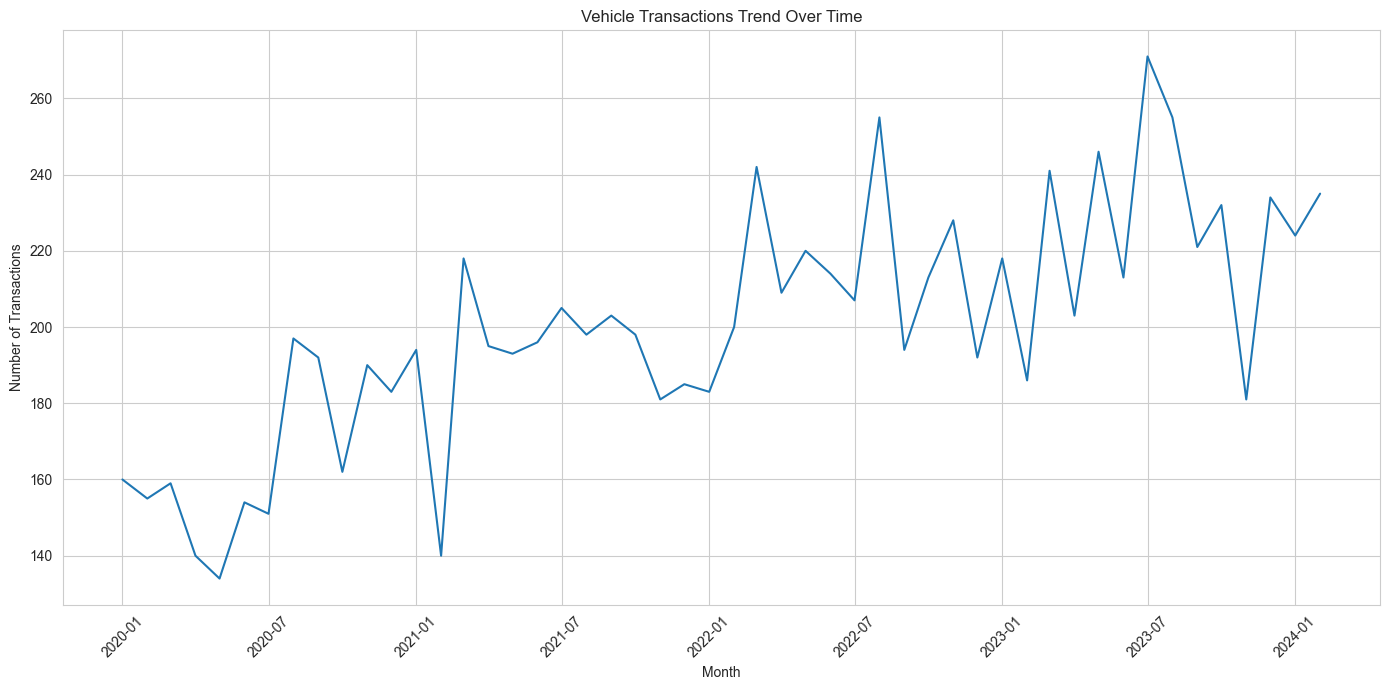

In [157]:
# Ensure 'Month' is in datetime format for plotting
transactions_per_month_df['Month'] = transactions_per_month_df['Month'].dt.to_timestamp()

# Re-plotting the trend of transactions over time with corrected 'Month' formatting
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Transaction Count', data=transactions_per_month_df)
plt.title('Vehicle Transactions Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
